<a href="https://colab.research.google.com/github/MuhammadShavaiz/pytorch-google-colab/blob/main/customdatasets_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [87]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [88]:
import os
def walkthrough_dir(path_name):
  for dirpath, dirnames, filenames in os.walk(path_name):
    print(f'there are {len(dirnames)} directories, and there are {len(filenames)} files')

In [89]:
walkthrough_dir(image_path)

there are 2 directories, and there are 0 files
there are 3 directories, and there are 0 files
there are 0 directories, and there are 78 files
there are 0 directories, and there are 75 files
there are 0 directories, and there are 72 files
there are 3 directories, and there are 0 files
there are 0 directories, and there are 25 files
there are 0 directories, and there are 19 files
there are 0 directories, and there are 31 files


In [90]:
train_path = image_path/'train'
test_path = image_path/'test'

image class: pizza
image height: 383
image width: 512


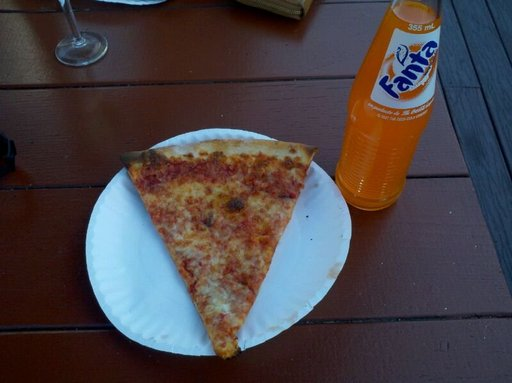

In [91]:
from PIL import Image
import random
image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image = random.choice(image_path_list)
random_image_class = random_image.parent.stem
image = Image.open(random_image)
print(f'image class: {random_image_class}')
print(f'image height: {image.height}')
print(f'image width: {image.width}')
image

Text(0.5, 1.0, 'class_name: pizza')

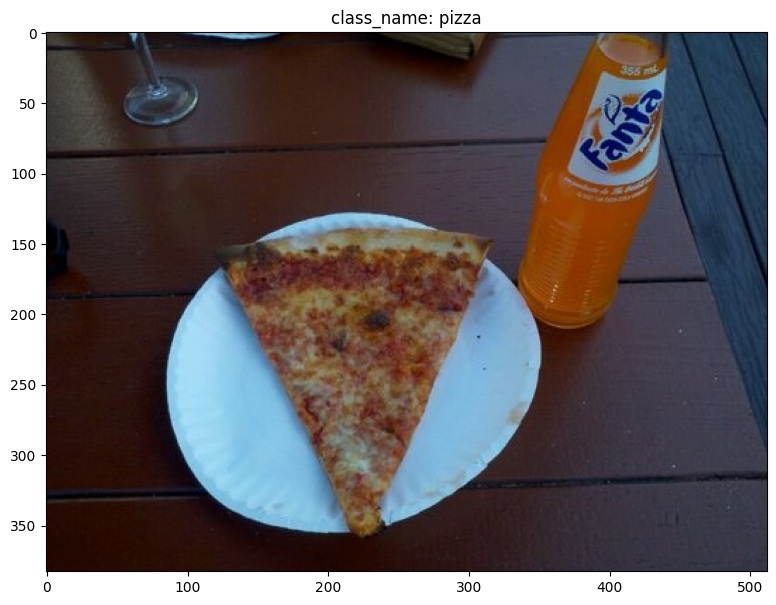

In [92]:
image_array = np.asarray(image)
plt.figure(figsize=(10,7))
plt.imshow(image_array)
plt.title(f'class_name: {random_image_class}')

In [93]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [94]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

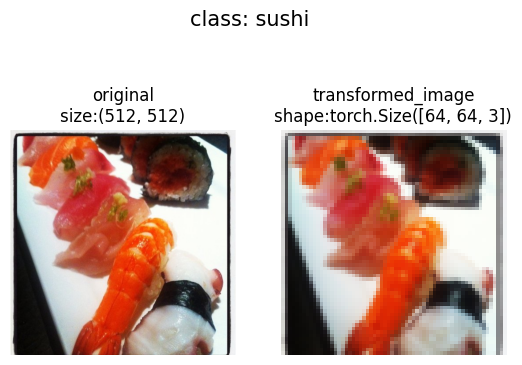

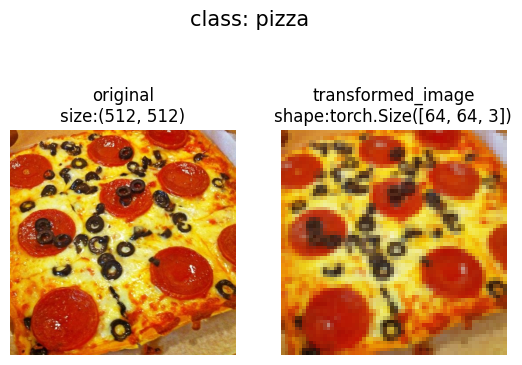

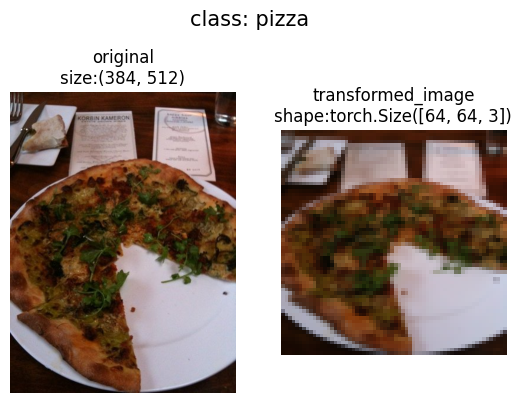

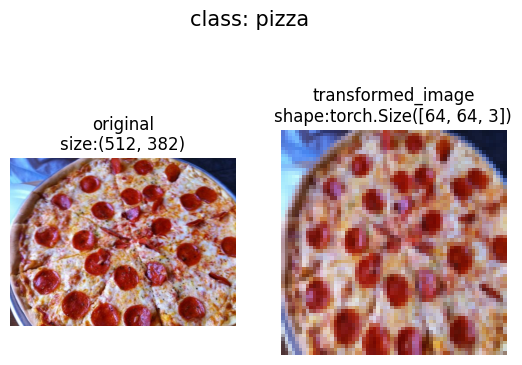

In [95]:
def plot_trans_img(image_path: list, transform, n=4, seed=None):
  random_image_paths = random.sample(image_path, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig ,ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\nsize:{f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'transformed_image\nshape:{transformed_image.shape}')
      ax[1].axis(False)

      fig.suptitle(f'class: {image_path.parent.stem}', fontsize = 15)

plot_trans_img(image_path_list, data_transform)



In [96]:
train_data = datasets.ImageFolder(root = train_path, transform = data_transform)
test_data = datasets.ImageFolder(root = test_path, transform = data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [97]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [98]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [99]:
img , label = train_data[0][0], train_data[0][1]
print(f'image_tensor:{img}')
print(f'image_shape:{img.shape}')
print(f'image_dtype:{img.dtype}')
print(f'label:{label}')
print(f'label_type:{type(label)}')

image_tensor:tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.090

original_shape:torch.Size([3, 64, 64])
permuted_shape:torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

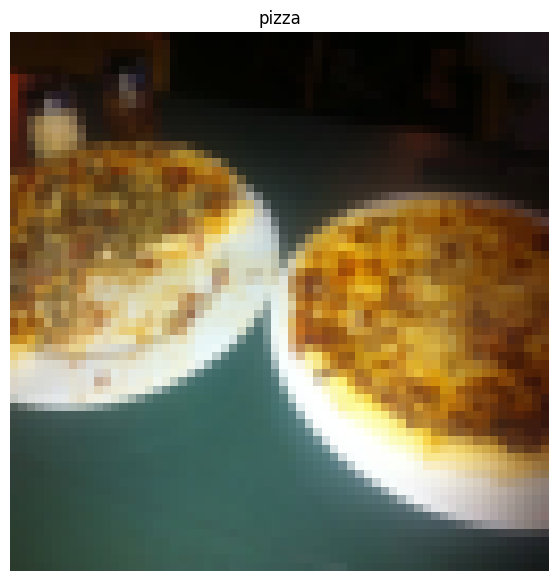

In [100]:
img_permute = img.permute(1,2,0)
print(f'original_shape:{img.shape}')
print(f'permuted_shape:{img_permute.shape}')
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f'{class_names[label]}')
plt.axis(False)

In [101]:
BATCH_SIZE = 16
train_dataloader = DataLoader(dataset = train_data, batch_size=BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size=BATCH_SIZE, shuffle = False)

In [102]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [103]:
batch, label = next(iter(train_dataloader))
print(f'image_shape:{img.shape}')
print(f'label_shape:{label.shape}')

image_shape:torch.Size([3, 64, 64])
label_shape:torch.Size([16])


In [104]:
import os
import pathlib
from PIL import Image
from typing import List, Dict, Tuple
from torch.utils.data import Dataset
from torchvision import transforms

In [105]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  classes = sorted (entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f'could not find any file in {directory} directory')
  class_to_idx = {class_names:i for i, class_names in enumerate(classes)}
  return classes, class_to_idx

In [106]:
find_classes(train_path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [107]:
class ImageFolderCustom(Dataset):
  def __init__(self, target_dir, transform = None):
    self.paths = list(pathlib.Path(target_dir).glob('*/*.jpg'))
    self.transform = transform
    self.classes , self.class_to_idx = find_classes(target_dir)
  def load_image(self, index:int):
    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self,index:int):
    image = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(image),class_idx
    else:
      return image ,class_idx




In [108]:
transform_train_custom = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
transform_test_custom = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
    ])

In [109]:
train_data_custom = ImageFolderCustom(train_path, transform_train_custom)
test_data_custom = ImageFolderCustom(test_path, transform_test_custom)

In [110]:
train_data_custom[1]

(tensor([[[0.6000, 0.6000, 0.6078,  ..., 0.4745, 0.4745, 0.4510],
          [0.6941, 0.6902, 0.7020,  ..., 0.4902, 0.4863, 0.4510],
          [0.7490, 0.7412, 0.7373,  ..., 0.5412, 0.5373, 0.4863],
          ...,
          [0.6706, 0.6627, 0.6392,  ..., 0.2863, 0.2784, 0.2627],
          [0.6353, 0.6118, 0.5765,  ..., 0.2471, 0.2431, 0.2314],
          [0.5882, 0.5647, 0.5255,  ..., 0.2235, 0.2157, 0.2078]],
 
         [[0.4314, 0.4314, 0.4275,  ..., 0.3137, 0.3176, 0.3059],
          [0.5059, 0.5059, 0.5059,  ..., 0.3333, 0.3294, 0.3059],
          [0.4196, 0.4118, 0.3961,  ..., 0.3647, 0.3608, 0.3333],
          ...,
          [0.3922, 0.3725, 0.3451,  ..., 0.1020, 0.0941, 0.0863],
          [0.3608, 0.3333, 0.3020,  ..., 0.0784, 0.0784, 0.0745],
          [0.3098, 0.2941, 0.2745,  ..., 0.0667, 0.0667, 0.0706]],
 
         [[0.3412, 0.3294, 0.3216,  ..., 0.2275, 0.2392, 0.2392],
          [0.3216, 0.3255, 0.3294,  ..., 0.2431, 0.2510, 0.2431],
          [0.2392, 0.2431, 0.2431,  ...,

In [111]:
len(train_data_custom), len(train_data)

(225, 225)

In [112]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [113]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(20, 10))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)


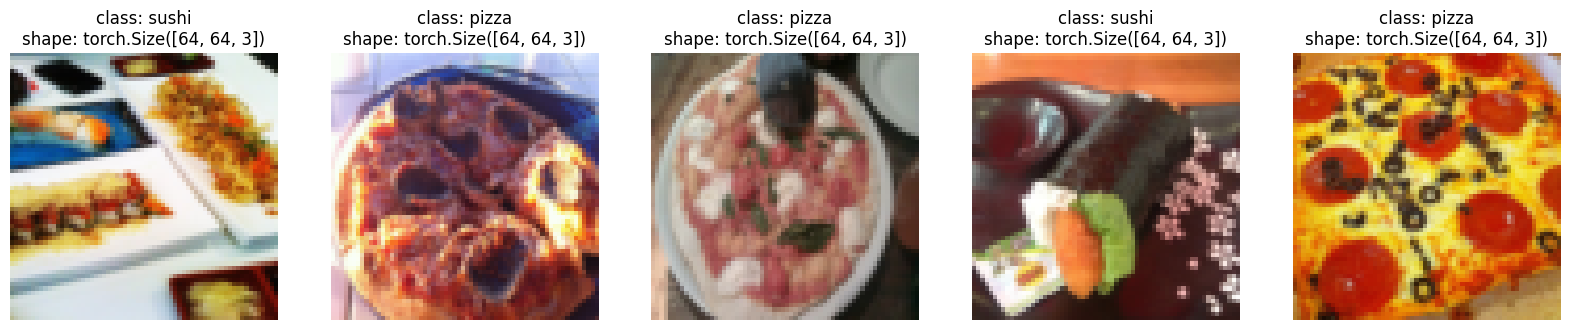

In [114]:
display_random_images(train_data, class_names, 5,  seed = 42)

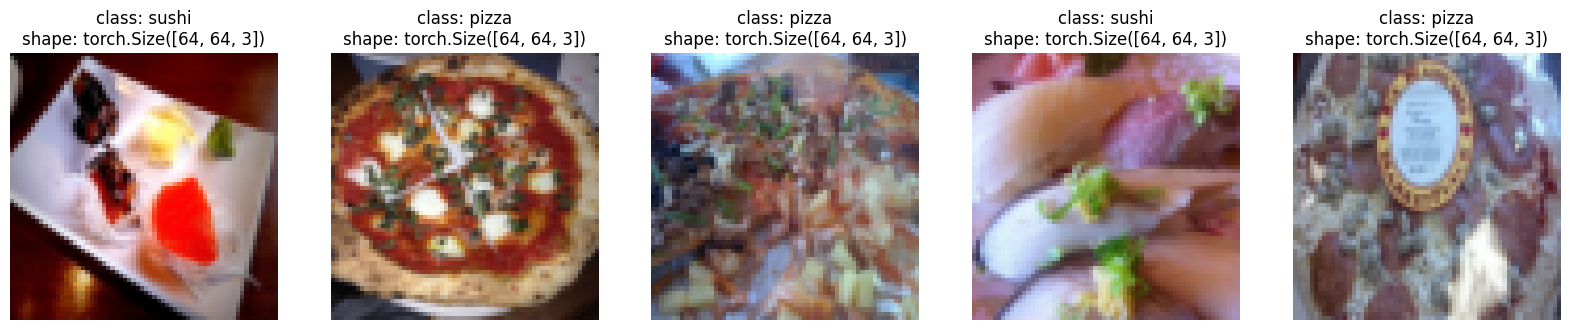

In [115]:
display_random_images(train_data_custom, train_data_custom.classes, 5, seed =42 )

In [116]:
custom_train_loader = DataLoader(dataset = train_data_custom, batch_size = 32, shuffle = True)
custom_test_loader = DataLoader (dataset = test_data_custom, batch_size = 32, shuffle = True)
custom_train_loader, custom_test_loader

(<torch.utils.data.dataloader.DataLoader at 0x78c578cc7a90>,
 <torch.utils.data.dataloader.DataLoader at 0x78c578cc7730>)

In [117]:
train_transform1 = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 10),
    transforms.ToTensor()
])
test_transform1 = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 10),
    transforms.ToTensor()
])

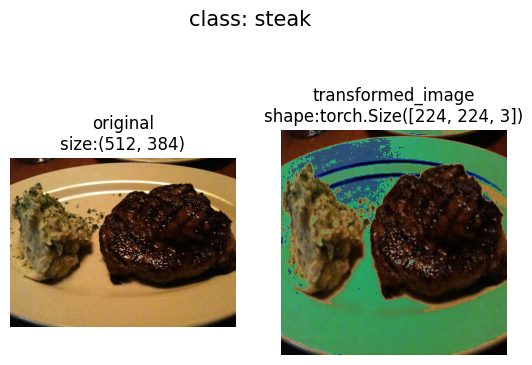

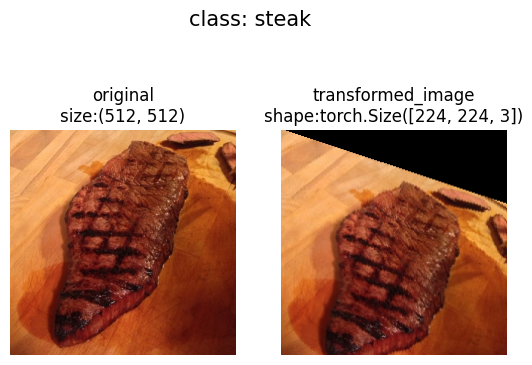

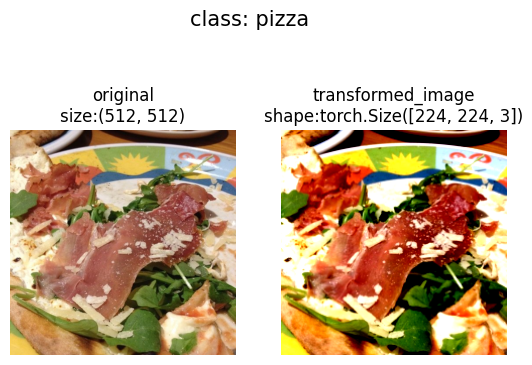

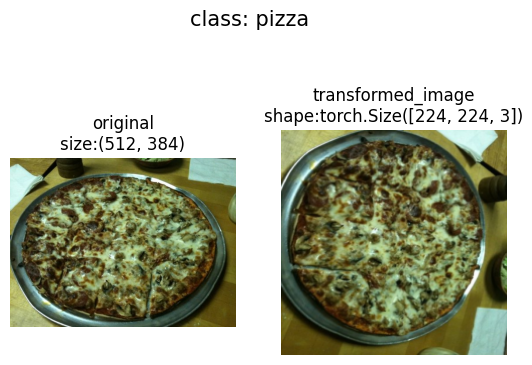

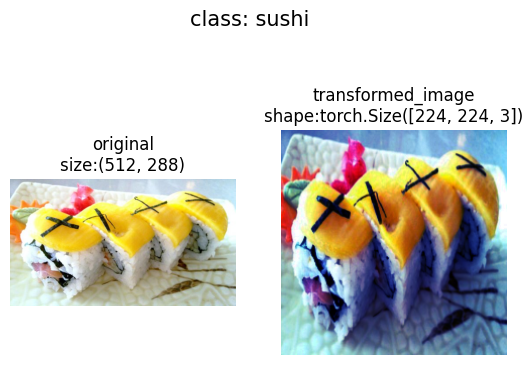

In [118]:
plot_trans_img(image_path_list, train_transform1, n = 5, seed = None)

In [119]:
train_data_transform1 = ImageFolderCustom(train_path, transform = train_transform1)
test_data_transform1 = ImageFolderCustom(test_path, transform = test_transform1)

In [120]:
traindata_loader_aug  = DataLoader(
    dataset = train_data_transform1, batch_size = 32, shuffle = True
)
testdata_loader_aug = DataLoader(
    dataset = test_data_transform1, batch_size = 32, shuffle = True
)

In [121]:
from torch import nn
class CnnMiniVgg(nn.Module):
  def __init__(self, input_shape, hidden_shape, output_shape):
    super().__init__()
    self.layer_convo1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_shape,
                  kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_shape, out_channels = hidden_shape,
                  kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
    self.layer_convo2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_shape, out_channels = hidden_shape,
                  kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_shape, out_channels = hidden_shape,
                  kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
    self.layer_classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= 1690, out_features=output_shape)
    )
  def forward(self, X):
    X = self.layer_convo1(X)
    X = self.layer_convo2(X)
    X = self.layer_classifier(X)
    return X
torch.manual_seed(42)
MiniVggmodel_1 = CnnMiniVgg(input_shape=3, # number of color channels (3 for RGB)
                  hidden_shape=10,
                  output_shape=len(train_data.classes)).to(device)
MiniVggmodel_1

CnnMiniVgg(
  (layer_convo1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_convo2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [122]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = MiniVggmodel_1.parameters(), lr =0.001)

In [123]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(MiniVggmodel_1, input_shape = (64,64))

Layer (type:depth-idx)                   Param #
CnnMiniVgg                               --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      5,073
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0

In [124]:
import torch

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  model.train()
  train_loss, train_acc = 0.0, 0.0

  for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)
  train_loss = train_loss/len(dataloader)
  train_acc  = train_acc/len(dataloader)
  return train_loss, train_acc


In [125]:
import torch

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
  model.eval()
  test_loss, test_acc = 0.0, 0.0
  with torch.inference_mode():  # Use torch.no_grad() instead of torch.inference_mode()
      for Batch, (X, y) in enumerate(dataloader):
          X, y = X.to(device), y.to(device)
          test_pred_logits = model(X)
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/len(dataloader)
  test_acc  = test_acc/len(dataloader)
  return test_loss, test_acc


In [126]:
from tqdm.auto import tqdm

def train(model,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn,
          epochs: int = 5,
          device:device = device):

  results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device = device)

    print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results


In [127]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5
from timeit import default_timer as timer
start_time = timer()
MiniVggmodel1_results = train(model = MiniVggmodel_1, train_dataloader = train_dataloader, test_dataloader = test_dataloader, optimizer = optimizer, loss_fn = loss_fn, epochs = NUM_EPOCHS)
end_time = timer()
print(f'total_train-test_time: {end_time-start_time: .3f}seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1060 | train_acc: 0.2958 | test_loss: 1.1055 | test_acc: 0.3125
Epoch: 2 | train_loss: 1.0919 | train_acc: 0.3875 | test_loss: 1.1089 | test_acc: 0.3125
Epoch: 3 | train_loss: 1.0907 | train_acc: 0.3875 | test_loss: 1.1122 | test_acc: 0.3250
Epoch: 4 | train_loss: 1.0768 | train_acc: 0.3750 | test_loss: 1.0716 | test_acc: 0.3750
Epoch: 5 | train_loss: 0.9804 | train_acc: 0.5792 | test_loss: 1.0009 | test_acc: 0.3739
total_train-test_time:  11.628seconds


In [128]:
MiniVggmodel1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [129]:
def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()


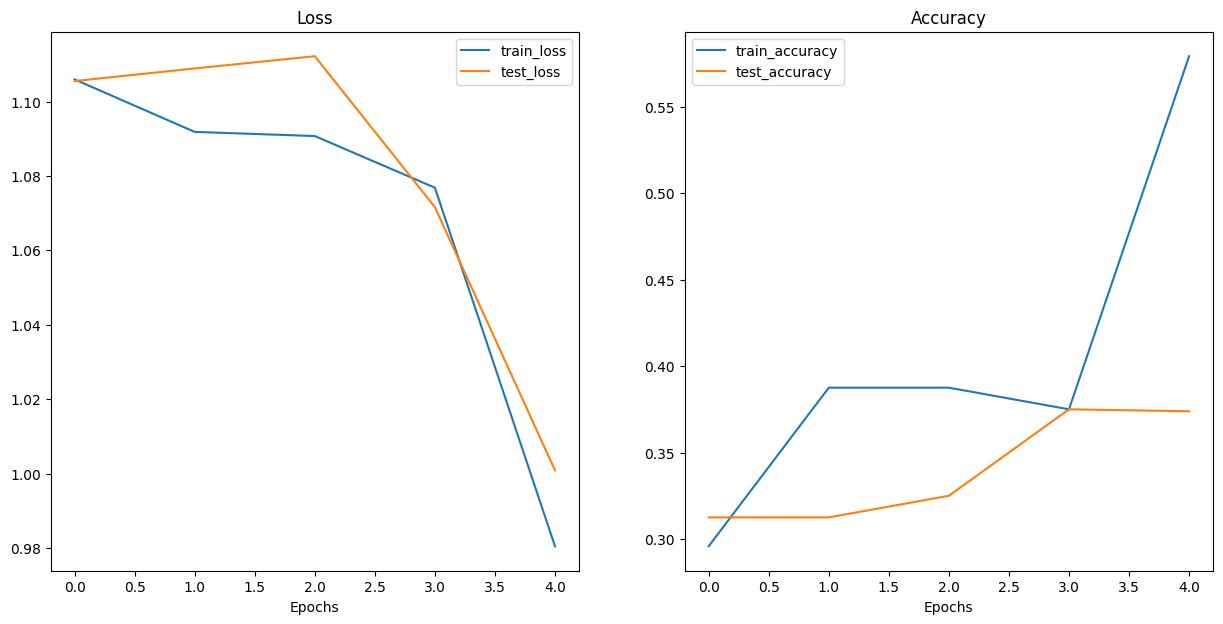

In [130]:
plot_loss_curves(MiniVggmodel1_results)

In [131]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [132]:
train_data_augmented = datasets.ImageFolder(root = train_path, transform = train_transform_trivial)
test_data_augmented = datasets.ImageFolder(root = test_path, transform = test_transform_simple)

In [133]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented, batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset = test_data_augmented, batch_size = BATCH_SIZE, shuffle = False, num_workers = NUM_WORKERS)



In [134]:
torch.manual_seed(42)
model_1 = CnnMiniVgg(input_shape = 3,
                     hidden_shape = 10,
                     output_shape = len(train_data_augmented.classes)).to(device)
model_1

CnnMiniVgg(
  (layer_convo1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_convo2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [135]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr= 0.001)

from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model = model_1, train_dataloader = train_dataloader_augmented, test_dataloader = test_dataloader_simple, optimizer = optimizer, loss_fn = loss_fn, epochs = NUM_EPOCHS, device = device)
end_time = timer()
print(f'total training and testing time: {end_time - start_time:.3f}seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0807 | train_acc: 0.4258 | test_loss: 1.1261 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0712 | train_acc: 0.4258 | test_loss: 1.1593 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1253 | train_acc: 0.3047 | test_loss: 1.1581 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0865 | train_acc: 0.4258 | test_loss: 1.1554 | test_acc: 0.3333
total training and testing time: 13.206seconds


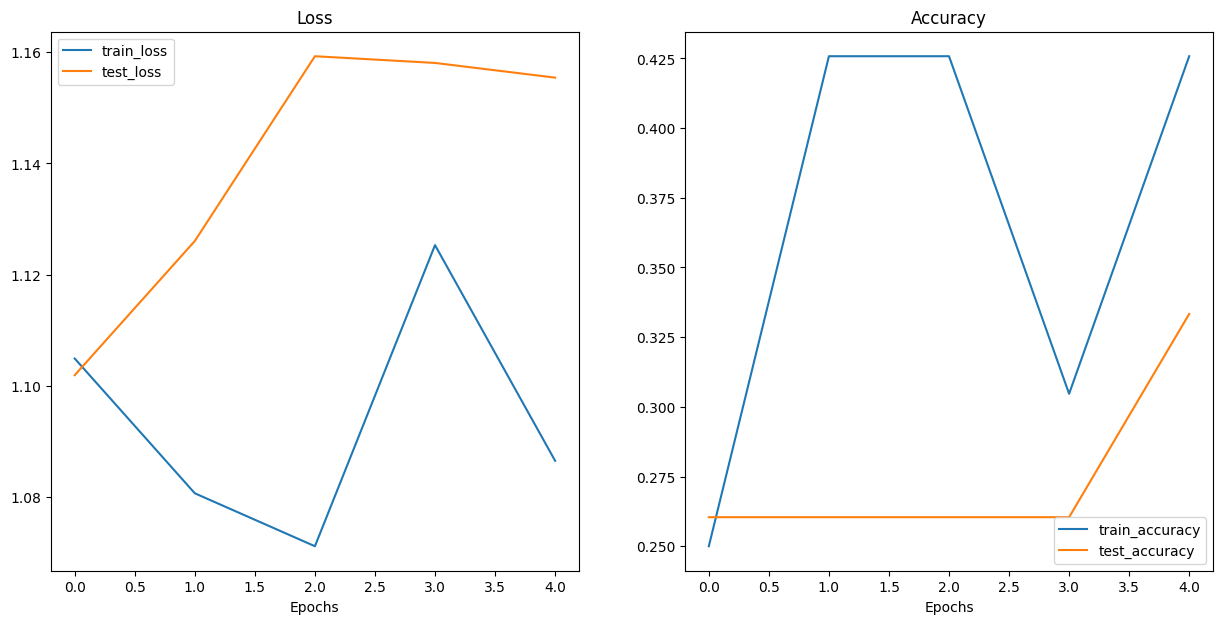

In [136]:
plot_loss_curves(model_1_results)

In [137]:
import pandas as pd
model_0_df = pd.DataFrame(MiniVggmodel1_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.105955,0.295833,1.105522,0.312500
1,1.091850,0.387500,1.108911,0.312500
2,1.090735,0.387500,1.112198,0.325000
3,1.076844,0.375000,1.071617,0.375000
4,0.980448,0.579167,1.000859,0.373864


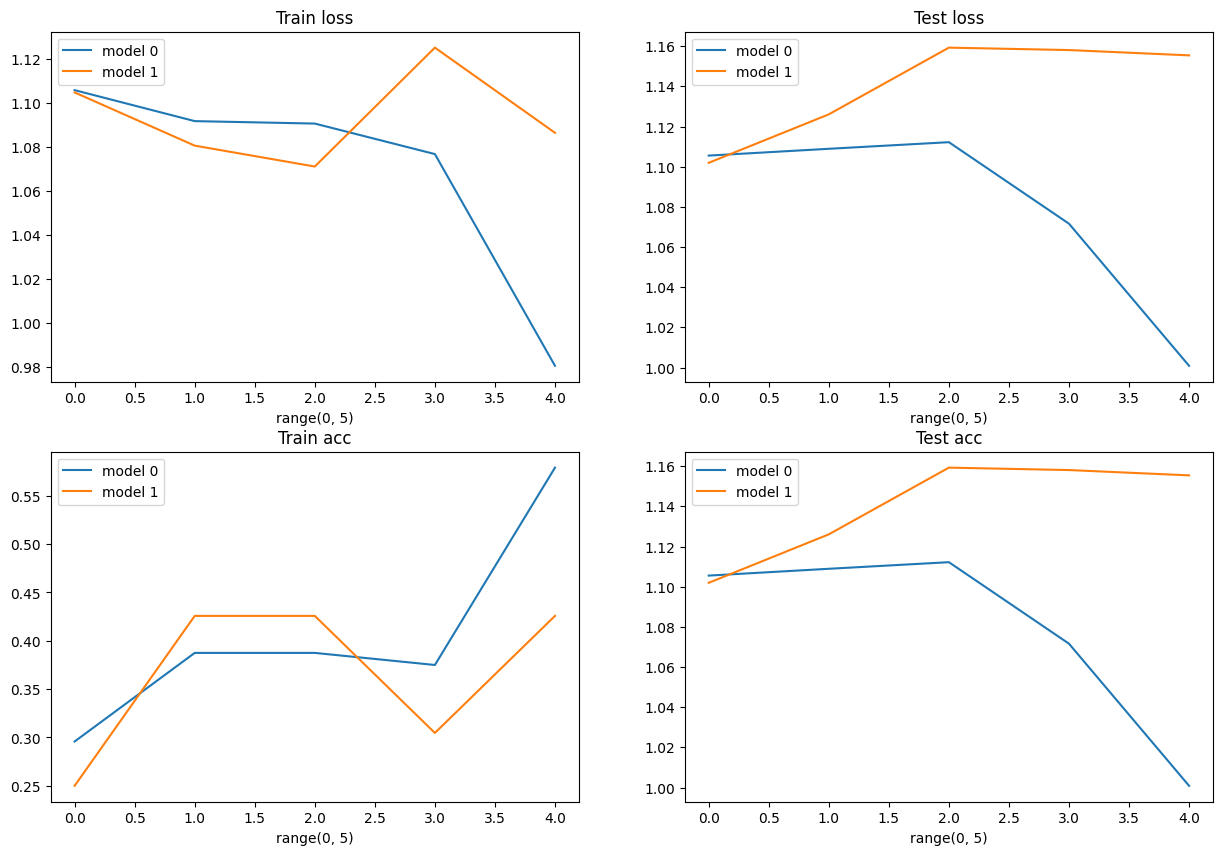

In [145]:
plt.figure(figsize=(15,10))
epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label = 'model 0')
plt.plot(epochs, model_1_df['train_loss'], label = 'model 1')
plt.title('Train loss')
plt.xlabel(epochs)
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label = 'model 0')
plt.plot(epochs, model_1_df['test_loss'], label = 'model 1')
plt.title('Test loss')
plt.xlabel(epochs)
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label = 'model 0')
plt.plot(epochs, model_1_df['train_acc'], label = 'model 1')
plt.title('Train acc')
plt.xlabel(epochs)
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_loss'], label = 'model 0')
plt.plot(epochs, model_1_df['test_loss'], label = 'model 1')
plt.title('Test acc')
plt.xlabel(epochs)
plt.legend()
